In [38]:
import pandas as pd
from io import StringIO
import csv
from pandas import read_csv
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk import ngrams
import collections

In [2]:
output = StringIO()
csv_writer = csv.writer(output)
column_name = ['Dateflowstart', 'Durat', 'Prot', 'SrcIPAddr:Port', 'DstIPAddr:Port', 'Flags', 'Tos', 'PacketsBytes', 'Flows', 'Label', 'Labels']
Botnet_data = pd.DataFrame(columns = column_name)
with open('capture20110818.pcap', 'rb') as f:
    next(f)
    for index, line in enumerate(f):
        #print(line)
        parser = line.decode("utf-8")
        split_by_space = parser.split('\t')
        #print(parser)
        #print(split_by_space)
        temp1 =  [x for x in split_by_space if x != '->']
        temp2 =  [x for x in temp1 if x != '']
        temp2[-1] = temp2[-1].split('\n')[0]
        #print(temp2)
        if(len(temp2)==1):
            
            #print(line)
            #print(parser)
            split_by_space = parser.split(' ')
            #print(split_by_space)
            temp1 =  [x for x in split_by_space if x != '->']
            temp2 =  [x for x in temp1 if x != '']
            temp2[-1] = temp2[-1].split('\n')[0]
            #print(temp2)
            x=temp2.pop(1)
            temp2[0]=temp2[0]+' '+x
            #print(temp1)
            #print(temp2)
        #print(temp1)
        #temp3 =  [x.split('\n')[0] for x in temp2 if '\n' in x]
        #print(temp2)
        if(temp2[-1]!='Background'):
            #print(temp2[-1])
            csv_writer.writerow(temp2)
#         Botnet_data.loc[index-1] = pd.Series(temp2, index=column_name)
    output.seek(0) # we need to get back to the start of the BytesIO
    Botnet_data = read_csv(output)


In [3]:
print(Botnet_data.head())
Botnet_data.columns = column_name
Botnet_data.head()
Botnet_data.to_csv('Botnet_data111.csv', sep='\t')

   2011-08-18 10:19:13.347  4.985  TCP      147.32.80.13:80  \
0  2011-08-18 10:19:13.392  0.000  TCP  147.32.86.110:48102   
1  2011-08-18 10:19:13.411  4.921  TCP   147.32.85.88:56949   
2  2011-08-18 10:19:13.460  4.742  TCP    147.32.84.59:2768   
3  2011-08-18 10:19:13.486  0.000  TCP   147.32.84.59:56058   
4  2011-08-18 10:19:13.689  4.434  TCP  147.32.84.164:34588   

   147.32.85.88:56949 PA_  0   91  86277  1  LEGITIMATE  
0  74.125.232.214:443  A_  0    1     66  1  LEGITIMATE  
1     147.32.80.13:80  A_  0   49   3234  1  LEGITIMATE  
2   74.125.108.208:80  A_  0  118   7080  1  LEGITIMATE  
3  74.125.232.215:443  A_  0    1     60  1  LEGITIMATE  
4   195.24.232.164:80  A_  0   30   1980  1  LEGITIMATE  


In [4]:
len(Botnet_data)

645357

In [5]:
# print(pd.unique(Botnet_data['SrcIPAddr:Port']))
# print(Botnet_data.shape)
# temp =Botnet_data.groupby('SrcIPAddr:Port')
# temp.describe()
# for key, item in temp:
#     print (temp.get_group(key), "\n\n")
Botnet_data.head()

,Dateflowstart,Durat,Prot,SrcIPAddr:Port,DstIPAddr:Port,Flags,Tos,PacketsBytes,Flows,Label,Labels
0,2011-08-18 10:19:13.392,0.000,TCP,147.32.86.110:48102,74.125.232.214:443,A_,0,1,66,1,LEGITIMATE
1,2011-08-18 10:19:13.411,4.921,TCP,147.32.85.88:56949,147.32.80.13:80,A_,0,49,3234,1,LEGITIMATE
2,2011-08-18 10:19:13.460,4.742,TCP,147.32.84.59:2768,74.125.108.208:80,A_,0,118,7080,1,LEGITIMATE
3,2011-08-18 10:19:13.486,0.000,TCP,147.32.84.59:56058,74.125.232.215:443,A_,0,1,60,1,LEGITIMATE
4,2011-08-18 10:19:13.689,4.434,TCP,147.32.84.164:34588,195.24.232.164:80,A_,0,30,1980,1,LEGITIMATE


**clustering all features**


possible features: Durat/Prot/Flags/Tos/PacketsBytes/Flows


In [6]:
print('-------------Durat---------------------')
print(Botnet_data['Durat'].quantile([0.2,0.4,0.6,0.8]))
print('-------------Prot---------------------')
print(pd.unique(Botnet_data['Prot']))
print('-------------Flags---------------------')
print(pd.unique(Botnet_data['Flags']))
print('-------------Tos---------------------')
print(Botnet_data['Tos'].quantile([0.2,0.4,0.6,0.8]))
print('-------------PacketsBytes---------------------')
print(Botnet_data['PacketsBytes'].quantile([0.2,0.4,0.6,0.8]))
print('-------------Flows---------------------')
print(Botnet_data['Flows'].quantile([0.2,0.4,0.6,0.8]))

-------------Durat---------------------
0.2    0.000
0.4    0.000
0.6    0.000
0.8    0.442
Name: Durat, dtype: float64
-------------Prot---------------------
['TCP' 'UDP' 'ICMP']
-------------Flags---------------------
['A_' 'PA_' 'FA_' 'SPA_' 'FPA_' 'INT' 'FSA_' '_FSA' 'FSPA_' '_FSPA' 'S_'
 'RA_' 'FSRPA_' 'SA_' '_FSRPA' 'SRPA_' 'FRPA_' 'ECO' 'URH' 'SR_' 'FRA_'
 'RPA_' 'R_' 'FSPAEC_' 'SRA_' '_FSRA' 'URP' 'PAC_' 'MAS' 'TST' 'IRR' 'ECR'
 'RTS' 'RTA' 'IRQ' 'UNK' 'MSR' 'TSR' 'SEC' 'ROB' 'MRQ' 'RED' 'IAH' 'TXD'
 'DNQ' 'PTB' 'PAR' 'NRA' 'WAY' 'PHO' '___' 'AHA' 'NRS' 'MHR' 'UR' 'NNA'
 'MRP' 'TRC' 'DCE' 'SKP' 'SRC' 'NNS' 'DNP' 'URN' 'URPRE' 'URS' 'URNU'
 'URCUT' 'URISO' 'URNPRO' 'URHPRO' 'URHTOS' 'URHU' 'SPAC_' 'SEC_' 'FSRA_'
 'URFIL' 'FSPAC_']
-------------Tos---------------------
0.2    0.0
0.4    0.0
0.6    0.0
0.8    0.0
Name: Tos, dtype: float64
-------------PacketsBytes---------------------
0.2    1.0
0.4    1.0
0.6    2.0
0.8    5.0
Name: PacketsBytes, dtype: float64
-------------Flows

so we abandon 'Tos' and assign value for categorical data. Then we factorize our categorical features.

In [8]:
# replace_port = {'TCP':1, 'UDP':2, 'ICMP':3}
# replace_flag = {'A_':1, 'FA_':2, 'PA_':3, 'FPA_':4, 'FSPA_':5, '_FSPA':6, 'INT':7, 'FSA_':8, '_FSA':9, 'SPA_':10,
#  'SRPA_':11, 'RA_':12, 'FRPA_':13, 'FSRPA_':14, 'URH':15, 'SA_':16, 'RPA_':17, 'FRA_':18, 'ECO' :19,'S_' :20,'R_':21,
#  '_FSRPA':22, 'FSPAC_':23, 'SRA_':24, 'TXD':25, 'URFIL' :26,'SR_':27, 'URP':28, '_FSRA':29, 'URHPRO':30, 'URN':31}

stacked = Botnet_data[['Flags','Prot']].stack()
Botnet_data[['Flags','Prot']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
print(Botnet_data.head())

             Dateflowstart  Durat  Prot       SrcIPAddr:Port  \
0  2011-08-18 10:19:13.392  0.000     1  147.32.86.110:48102   
1  2011-08-18 10:19:13.411  4.921     1   147.32.85.88:56949   
2  2011-08-18 10:19:13.460  4.742     1    147.32.84.59:2768   
3  2011-08-18 10:19:13.486  0.000     1   147.32.84.59:56058   
4  2011-08-18 10:19:13.689  4.434     1  147.32.84.164:34588   

       DstIPAddr:Port  Flags  Tos  PacketsBytes  Flows  Label      Labels  
0  74.125.232.214:443      0    0             1     66      1  LEGITIMATE  
1     147.32.80.13:80      0    0            49   3234      1  LEGITIMATE  
2   74.125.108.208:80      0    0           118   7080      1  LEGITIMATE  
3  74.125.232.215:443      0    0             1     60      1  LEGITIMATE  
4   195.24.232.164:80      0    0            30   1980      1  LEGITIMATE  


C:\Users\zinaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\zinaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
C:\Users\zinaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


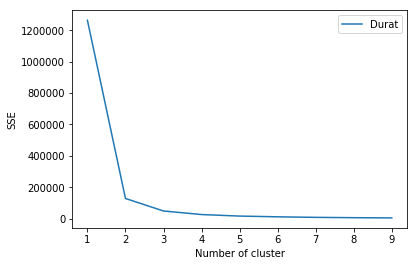

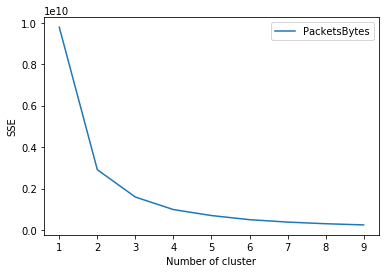

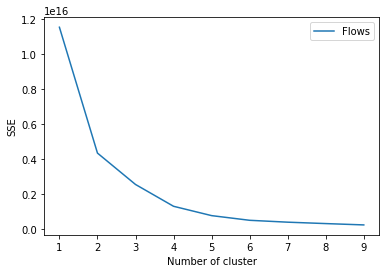

In [9]:
# Durat/Prot/Flags/PacketsBytes/Flows
sse1 = {}
sse4 = {}
sse5 = {}
for k in range(1, 10):
    kmeans1 = KMeans(n_clusters=k, max_iter=1000).fit(Botnet_data['Durat'].reshape(-1, 1))
    kmeans4 = KMeans(n_clusters=k, max_iter=1000).fit(Botnet_data['PacketsBytes'].reshape(-1, 1))
    kmeans5 = KMeans(n_clusters=k, max_iter=1000).fit(Botnet_data['Flows'].reshape(-1, 1))
    Botnet_data['ClusterDurat'] = kmeans1.labels_
    Botnet_data['ClusterPacketsBytes'] = kmeans4.labels_
    Botnet_data['ClusterFlows'] = kmeans5.labels_
    #print(data["clusters"])
    sse1[k] = kmeans1.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    sse4[k] = kmeans4.inertia_
    sse5[k] = kmeans5.inertia_
plt.figure()
plt.plot(list(sse1.keys()), list(sse1.values()),label = 'Durat')
plt.legend(loc='upper right')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
plt.plot(list(sse4.keys()), list(sse4.values()),label = 'PacketsBytes')
plt.legend(loc='upper right')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
plt.plot(list(sse5.keys()), list(sse5.values()),label = 'Flows')
plt.legend(loc='upper right')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

so for durat we choose 2 as number of clusters, 3 for packetbytes and 4 for flows. 

Then we calculate the threshold of different features, results can be found below.

we assign  0 when DURAT is smaller than 0.22, or we set 1.

we assign 0 when PacketsBytes is smaller than 1.0. Or we set 1.

we assign 0 when Flows is smaller than 261.0. For its value between 261.0 and 1066.0, we set 1 and for value from 1066.0 to 1306.0 we set 2, or we set 3.

In [10]:
print('-------------Durat---------------------')
print(Botnet_data['Durat'].quantile([0.75]))
print('-------------PacketsBytes---------------------')
print(Botnet_data['PacketsBytes'].quantile([0.33,0.66]))
print('-------------Flows---------------------')
print(Botnet_data['Flows'].quantile([0.25,0.5,0.75]))

-------------Durat---------------------
0.75    0.222
Name: Durat, dtype: float64
-------------PacketsBytes---------------------
0.33    1.0
0.66    2.0
Name: PacketsBytes, dtype: float64
-------------Flows---------------------
0.25     261.0
0.50    1066.0
0.75    1306.0
Name: Flows, dtype: float64


In [15]:
print(Botnet_data.shape)
new_column_name = ['Dateflowstart', 'Durat', 'Prot', 'SrcIPAddr:Port', 'DstIPAddr:Port', 'Flags', 'PacketsBytes', 'Flows', 'Label', 'Labels']
numeric_data = pd.DataFrame(column_name)
numeric_data = Botnet_data[new_column_name].copy()
numeric_data.describe()

(645357, 14)


,Durat,Prot,Flags,PacketsBytes,Flows,Label
count,645357.000000,645357.000000,645357.000000,645357.000000,6.453570e+05,645357.0
mean,0.628296,10.347725,17.386899,17.501792,1.347249e+04,1.0
std,1.399220,9.414517,15.481148,123.108235,1.337653e+05,0.0
min,0.000000,1.000000,0.000000,1.000000,6.000000e+01,1.0
25%,0.000000,1.000000,2.000000,1.000000,2.610000e+02,1.0
50%,0.000000,7.000000,15.000000,1.000000,1.066000e+03,1.0
75%,0.222000,20.000000,34.000000,4.000000,1.306000e+03,1.0
max,22.581000,20.000000,80.000000,16937.000000,2.497247e+07,1.0


**Discretization**

This part is used for part3 and part4.

In [17]:
for index,vallue in Botnet_data.iterrows():
#     ------------------Durat-------------------------
#     print(Botnet_data['Durat'][index])
    if Botnet_data['Durat'][index] < 0.22:
        numeric_data.set_value(index, 'Durat',int(0))
    else:
        numeric_data.set_value(index, 'Durat',int(1))
#     ------------------PacketsBytes-------------------------
    if Botnet_data['PacketsBytes'][index] <= 1.0:
        numeric_data.set_value(index, 'PacketsBytes', 0)
    else:
        numeric_data.set_value(index, 'PacketsBytes',1)
#     ------------------Flows-------------------------
    if Botnet_data['Flows'][index] < 261.0:
        numeric_data.set_value(index, 'Flows', 0)
    else:
        if 261.0 <= Botnet_data['Flows'][index]<1066.0:
            numeric_data.set_value(index, 'Flows', 1)
        else:
            if 1066.0 <= Botnet_data['Flows'][index]<1306.0:
                numeric_data.set_value(index, 'Flows', 2)
            else:
                numeric_data.set_value(index, 'Flows', 3)
numeric_data['Durat'] = numeric_data['Durat'].astype(int)
numeric_data.describe()

C:\Users\zinaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\zinaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\zinaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\zinaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\zinaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and 

,Durat,Prot,Flags,PacketsBytes,Flows,Label
count,645357.000000,645357.000000,645357.000000,645357.000000,645357.000000,645357.0
mean,0.251275,10.347725,17.386899,0.416758,1.673449,1.0
std,0.433747,9.414517,15.481148,0.493023,1.103632,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,2.000000,0.000000,1.000000,1.0
50%,0.000000,7.000000,15.000000,0.000000,2.000000,1.0
75%,1.000000,20.000000,34.000000,1.000000,3.000000,1.0
max,1.000000,20.000000,80.000000,1.000000,3.000000,1.0


In [18]:
numeric_data.head()

,Dateflowstart,Durat,Prot,SrcIPAddr:Port,DstIPAddr:Port,Flags,PacketsBytes,Flows,Label,Labels
0,2011-08-18 10:19:13.392,0,1,147.32.86.110:48102,74.125.232.214:443,0,0,0,1,LEGITIMATE
1,2011-08-18 10:19:13.411,1,1,147.32.85.88:56949,147.32.80.13:80,0,1,3,1,LEGITIMATE
2,2011-08-18 10:19:13.460,1,1,147.32.84.59:2768,74.125.108.208:80,0,1,3,1,LEGITIMATE
3,2011-08-18 10:19:13.486,0,1,147.32.84.59:56058,74.125.232.215:443,0,0,0,1,LEGITIMATE
4,2011-08-18 10:19:13.689,1,1,147.32.84.164:34588,195.24.232.164:80,0,1,3,1,LEGITIMATE


In [19]:
print(len(np.unique(numeric_data['Durat'])))
print(len(np.unique(numeric_data['Prot'])))
print(len(np.unique(numeric_data['Flags'])))
print(len(np.unique(numeric_data['PacketsBytes'])))
print(len(np.unique(numeric_data['Flows'])))

2
3
78
2
4


now we can apply algorithm1 in paper to combine all features

as mentioned, for durat we choose 2 as number of clusters, 3 for prot, 78 for flags, 2 for packetbytes and 4 for flows. our space is 2\*3\*78\*2\*4=3744

In [20]:
# features: durat, prot, flags, packetbytes, flows
# 2*3*78*2*4=3744
feature_dict = {'Durat':2, 'Prot':3, 'Flags':78, 'PacketsBytes':2, 'Flows':4}
code_list = []
for index, row in numeric_data.iterrows():
    code = 0
    spacesize = 3744
    code = code + numeric_data['Durat'][index]*(spacesize/feature_dict['Durat'])
    spacesize = spacesize/feature_dict['Durat']
    code = code + numeric_data['Prot'][index]*(spacesize/feature_dict['Prot'])
    spacesize = spacesize/feature_dict['Prot']
    code = code + numeric_data['Flags'][index]*(spacesize/feature_dict['Flags'])
    spacesize = spacesize/feature_dict['Flags']
    code = code + numeric_data['PacketsBytes'][index]*(spacesize/feature_dict['PacketsBytes'])
    spacesize = spacesize/feature_dict['PacketsBytes']
    code = code + numeric_data['Flows'][index]*(spacesize/feature_dict['Flows'])
    spacesize = spacesize/feature_dict['Flows']
    code_list.append(int(code)) 
print(len(code_list))

645357


In [124]:
code_ = pd.Series(code_list)
numeric_data['code'] = code_.values
numeric_data.head()
# numeric_data.to_csv('numeric_data_scenario10.csv', sep='\t')

,Dateflowstart,Durat,Prot,SrcIPAddr:Port,DstIPAddr:Port,Flags,PacketsBytes,Flows,Label,Labels,code
0,2011-08-18 10:19:13.392,0,1,147.32.86.110:48102,74.125.232.214:443,0,0,0,1,LEGITIMATE,624
1,2011-08-18 10:19:13.411,1,1,147.32.85.88:56949,147.32.80.13:80,0,1,3,1,LEGITIMATE,2503
2,2011-08-18 10:19:13.460,1,1,147.32.84.59:2768,74.125.108.208:80,0,1,3,1,LEGITIMATE,2503
3,2011-08-18 10:19:13.486,0,1,147.32.84.59:56058,74.125.232.215:443,0,0,0,1,LEGITIMATE,624
4,2011-08-18 10:19:13.689,1,1,147.32.84.164:34588,195.24.232.164:80,0,1,3,1,LEGITIMATE,2503


In [23]:
all_source = np.unique(numeric_data['SrcIPAddr:Port'])
source_dict = defaultdict(list)
for val in numeric_data.iterrows():
    source_dict[val[1][3]].append(val[1][10])

In [24]:
print(len(all_source))
print(len(source_dict))

67960
67960


In [128]:
def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])
infected_host = ['147.32.84.165','147.32.84.191','147.32.84.192','147.32.84.193','147.32.84.204',
                 '147.32.84.205','147.32.84.206','147.32.84.207','147.32.84.208','147.32.84.209']
normal_host = ['147.32.84.170','147.32.84.134','147.32.84.164']
# not reliable: '147.32.87.36','147.32.80.9','147.32.87.11'
choose_infected_host = '147.32.84.165'
test_ip = ['147.32.84.191','147.32.84.192','147.32.84.193','147.32.84.204','147.32.84.205',
           '147.32.84.206','147.32.84.207','147.32.84.208','147.32.84.209','147.32.84.170',
           '147.32.84.134','147.32.84.164']
n = 3
infected_gram_dict = defaultdict(list)
normal_gram_dict = defaultdict(list)
first_two_list = []
gram_list = []
possible_gram = source_dict[choose_infected_host]
grams = list(find_ngrams(possible_gram, n))
for pick_first_two in grams:
    first_two_list.append(pick_first_two[0:2])
gram_list.append(grams)
print('length_of_training data sequence:', len(gram_list[0]))

sliding_window_width = 4
test_gram_dict = defaultdict(list)
test_list = []
length_of_sequence = 0
for temp in test_ip:
    possible_gram = source_dict[temp]
    grams = list(find_ngrams(possible_gram, sliding_window_width))
    print(temp,'length of grams:', len(grams))
    test_gram_dict[temp] = grams
    test_list.append(list(set(grams)))
    length_of_sequence = length_of_sequence+len(grams)
print('length_of_sequence:', length_of_sequence)

length_of_training data sequence: 19136
147.32.84.191 length of grams: 20821
147.32.84.192 length of grams: 20813
147.32.84.193 length of grams: 19875
147.32.84.204 length of grams: 22145
147.32.84.205 length of grams: 23871
147.32.84.206 length of grams: 22488
147.32.84.207 length of grams: 21165
147.32.84.208 length of grams: 22183
147.32.84.209 length of grams: 19404
147.32.84.170 length of grams: 12
147.32.84.134 length of grams: 0
147.32.84.164 length of grams: 694
length_of_sequence: 193471


we have 706 normal sequences and 192765 infected sequences(99.6%). In total we have 193471 sequences in test set and 19136 sequences in training set. Now we create labels for sequences. 

In [131]:
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros
def oneslistmaker(n):
    listofones = [1] * n
    return listofones
test_sequence_label = oneslistmaker(192765) + zerolistmaker(706)
print(len(test_sequence_label),test_sequence_label[192760:192770])

193471 [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


to avoid probability of 0, we add 1 for each counter.

In [136]:
test_prob = []
cookie_dict ={}
for single_test_ip in test_ip:
    single_ip_grams = test_gram_dict[single_test_ip]
    for test_gram in single_ip_grams:
        if test_gram[0:2] in cookie_dict:
            prob1 = cookie_dict[test_gram[0:2]]
        else:
            prob1 = (first_two_list.count(test_gram[0:2])+1)/len(gram_list[0])
        if test_gram[0:3] in cookie_dict:
            prob2 = cookie_dict[test_gram[0:3]]
        else:
            prob2 = (gram_list[0].count(test_gram[0:3])+1)/len(gram_list[0])
        if test_gram[1:4] in cookie_dict:
            prob3 =  cookie_dict[test_gram[1:4]]
        else:
            prob3 = (gram_list[0].count(test_gram[1:4])+1)/len(gram_list[0])
        cookie_dict[test_gram[0:2]]= prob1
        cookie_dict[test_gram[0:3]]= prob2
        cookie_dict[test_gram[1:4]]= prob3
        prob = prob1*prob2*prob3
        test_prob.append(prob)
print(len(test_prob))

193471


In [181]:
np.percentile(test_prob, 0.4)

1.4270740634742588e-13

In [182]:
predicted_sequence_label =  []
for probability in test_prob:
    if probability<= 1.4270740634742588e-13:
        label = 0
    else:
        label = 1
    predicted_sequence_label.append(label)  
print(len(predicted_sequence_label))
print(len(test_sequence_label))

193471
193471


In [183]:
TP=0
FN=0
TN=0
FP=0
for index,val in enumerate(test_sequence_label):
    if predicted_sequence_label[index]==1 and val ==1:
        TP +=1
    if predicted_sequence_label[index]==0 and val ==1:
        FN +=1
    if predicted_sequence_label[index]==0 and val ==0:
        TN +=1
    if predicted_sequence_label[index]==1 and val ==0:
        FP +=1
#     print(index, predicted_sequence_label[index],val,'\n' ,TP,FN,TN,FP)
print ('TP:',TP)
print ('FP:',FP)
print ('TN:',TN)
print ('FN:',FN)
print ('precision:' ,1.0 * TP/(TP+FP))
print ('recall:' ,1.0 *TP/(TP+FN))
print('accuracy',(TP+TN)/len(predicted_sequence_label))

TP: 192361
FP: 0
TN: 706
FN: 404
precision: 1.0
recall: 0.9979041838508028
accuracy 0.9979118317473936


now we calculate host level accuracy. If over 50% sequences are defined as infected, we define host as infected. Or we define it as normal. I print sum of predicted label for each host, which means the number of infected sequences in our prediction. We know the ground truth is that the first 9 host are infected and the rest three are normal.

In [199]:
# 147.32.84.191 length of grams: 20821
print(sum(predicted_sequence_label[0:20820]))
# 20781 so we assign this host as infected

# 147.32.84.192 length of grams: 20813
print(sum(predicted_sequence_label[20820:41633]))
# 20764 so we assign this host as infected

# 147.32.84.193 length of grams: 19875
print(sum(predicted_sequence_label[41633:61508]))
# 19838 so we assign this host as infected

# 147.32.84.204 length of grams: 22145
print(sum(predicted_sequence_label[61508:83653]))
# 22097 so we assign this host as infected

# 147.32.84.205 length of grams: 23871
print(sum(predicted_sequence_label[83653:107524]))
# 23817 so we assign this host as infected

# 147.32.84.206 length of grams: 22488
print(sum(predicted_sequence_label[107524:130012]))
# 22452 so we assign this host as infected

# 147.32.84.207 length of grams: 21165
print(sum(predicted_sequence_label[130012:151177]))
# 21120 so we assign this host as infected

# 147.32.84.208 length of grams: 22183
print(sum(predicted_sequence_label[151177:173360]))
# 22127 so we assign this host as infected

# 147.32.84.209 length of grams: 19404
print(sum(predicted_sequence_label[173360:192764]))
# 19364 so we assign this host as infected

# 147.32.84.170 length of grams: 12
print(sum(predicted_sequence_label[192764:192776]))
# 1 so we assign this host as normal

# 147.32.84.134 length of grams: 0

# 147.32.84.164 length of grams: 694
print(sum(predicted_sequence_label[192776:193470]))
# 0 so we assign this host as normal

# length_of_sequence: 193471

20781
20764
19838
22097
23817
22452
21120
22127
19364
1
0
